In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Enable inline plotting
%matplotlib inline

# Path to the directory containing Patient_XX folders
base_dir = Path("~/canvas-hyperscribe/evaluations/cases/synthetic_unit_cases/med_management_collated").expanduser()

In [10]:
all_reports = []

for patient_dir in sorted(base_dir.glob("Patient_*")):
    #change this based on the eval report you want to analyze, either eval_report or eval_report o3
    csv_path = patient_dir / "eval_report_o3.csv" 
    if csv_path.exists():
        df = pd.read_csv(csv_path)
        df["Patient"] = patient_dir.name
        all_reports.append(df)

if not all_reports:
    raise RuntimeError("No eval_report.csv files found. Please check that they exist.")

full_df = pd.concat(all_reports, ignore_index=True)
print(f"Loaded {len(full_df)} rows across {len(all_reports)} patients.")
full_df.head()


Loaded 272 rows across 40 patients.


,Criterion #,Criterion,Max Score,Satisfaction (%),Score Awarded,Rationale,Patient
0,1,Reward for clear and concise HPI that accurate...,20,5.0,1.0,No HPI present—no mention of losartan toleranc...,Patient_1
1,2,Reward for explicit medication reconciliation ...,15,0.0,0.0,No medication list or reconciliation provided.,Patient_1
2,3,Penalize for missing or incorrect Assessment a...,20,20.0,4.0,Assessment/Plan for HTN and HLD entirely absen...,Patient_1
3,4,Reward for documenting patient safety counseli...,10,85.0,8.5,Provides counseling on monitoring BP and havin...,Patient_1
4,5,Penalize for absence of objective data or ROS ...,10,10.0,1.0,"No vitals, ROS, or summary of home BP log docu...",Patient_1


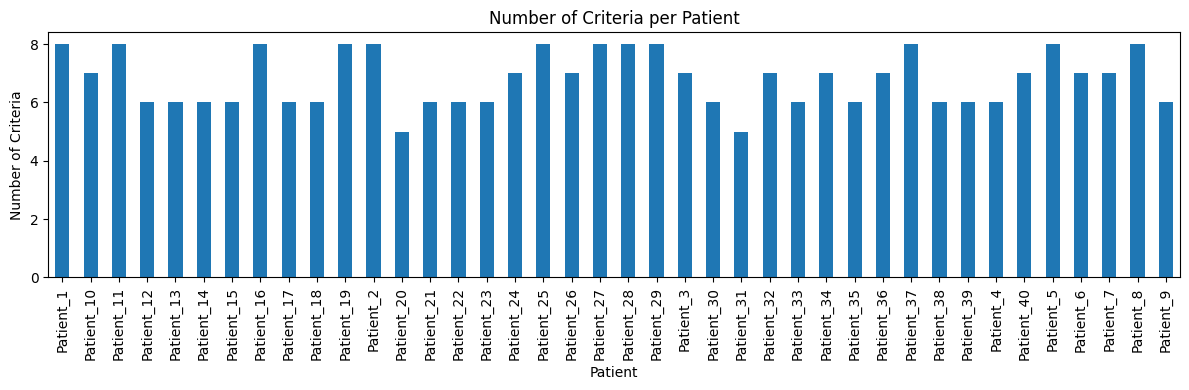

Summary statistics for number of criteria per patient:


count    40.000000
mean      6.800000
std       0.939176
min       5.000000
25%       6.000000
50%       7.000000
75%       8.000000
max       8.000000
dtype: float64

In [11]:
criteria_counts = full_df.groupby("Patient").size()

criteria_counts.plot(kind='bar', figsize=(12, 4), title="Number of Criteria per Patient")
plt.xlabel("Patient")
plt.ylabel("Number of Criteria")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("Summary statistics for number of criteria per patient:")
criteria_counts.describe()


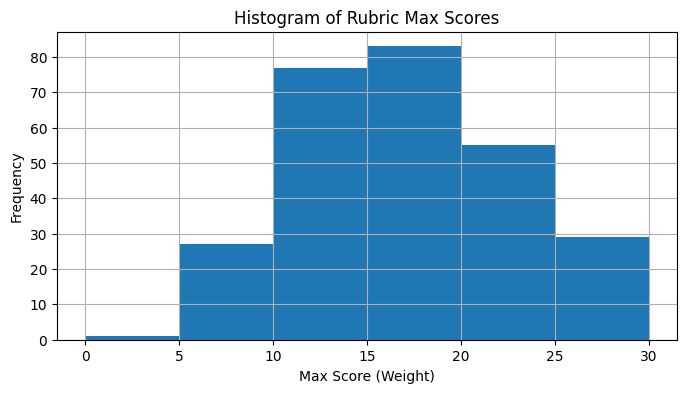

count    272.000000
mean      14.852941
std        5.759035
min        4.000000
25%       10.000000
50%       15.000000
75%       20.000000
max       30.000000
Name: Max Score, dtype: float64

In [12]:
plt.figure(figsize=(8, 4))
full_df["Max Score"].hist(bins=range(0, int(full_df["Max Score"].max()) + 5, 5))
plt.title("Histogram of Rubric Max Scores")
plt.xlabel("Max Score (Weight)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

full_df["Max Score"].describe()


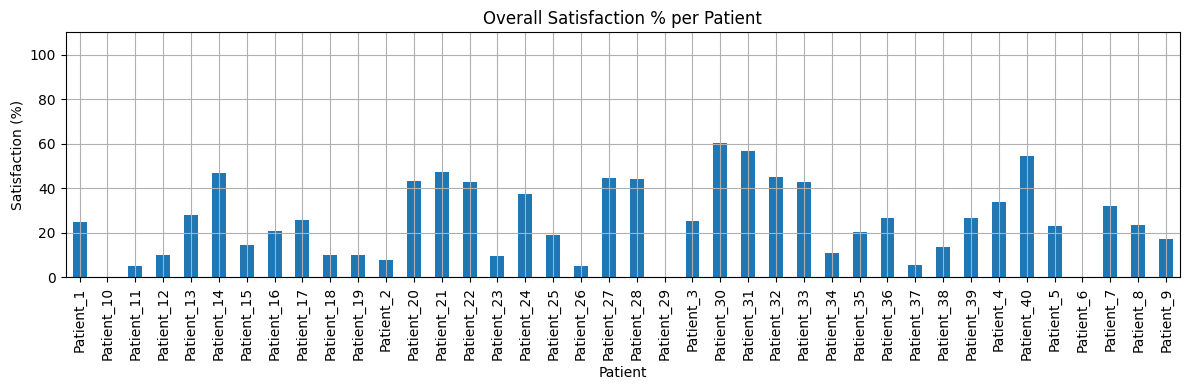

count    40.000000
mean     24.615152
std      18.490957
min     -12.000000
25%      10.000000
50%      24.275000
75%      42.812500
max      60.500000
Name: Satisfaction %, dtype: float64

In [13]:
# Compute total awarded score and total max score per patient
case_scores = (
    full_df.groupby("Patient")
    .agg({"Score Awarded": "sum", "Max Score": "sum"})
    .rename(columns={"Score Awarded": "Total Score", "Max Score": "Total Max Score"})
)

# Compute satisfaction %
case_scores["Satisfaction %"] = 100 * case_scores["Total Score"] / case_scores["Total Max Score"]

# Plot
case_scores["Satisfaction %"].plot(kind='bar', figsize=(12, 4), title="Overall Satisfaction % per Patient", ylim=(0, 110))
plt.ylabel("Satisfaction (%)")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

# Display summary statistics
case_scores["Satisfaction %"].describe()


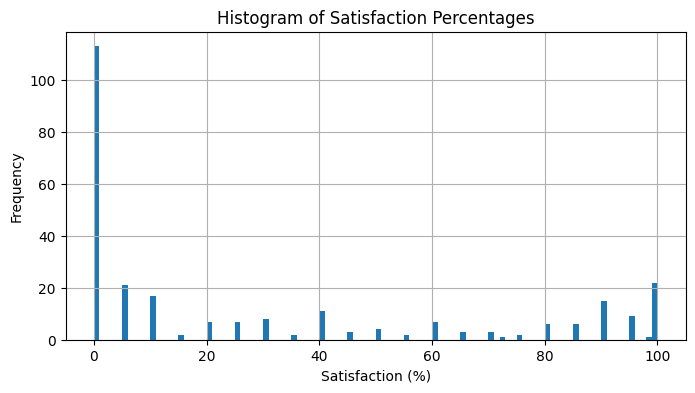

count    272.000000
mean      30.716912
std       37.724638
min        0.000000
25%        0.000000
50%       10.000000
75%       61.250000
max      100.000000
Name: Satisfaction (%), dtype: float64

In [14]:
plt.figure(figsize=(8, 4))
full_df["Satisfaction (%)"].hist(bins=100)
plt.title("Histogram of Satisfaction Percentages")
plt.xlabel("Satisfaction (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

full_df["Satisfaction (%)"].describe()


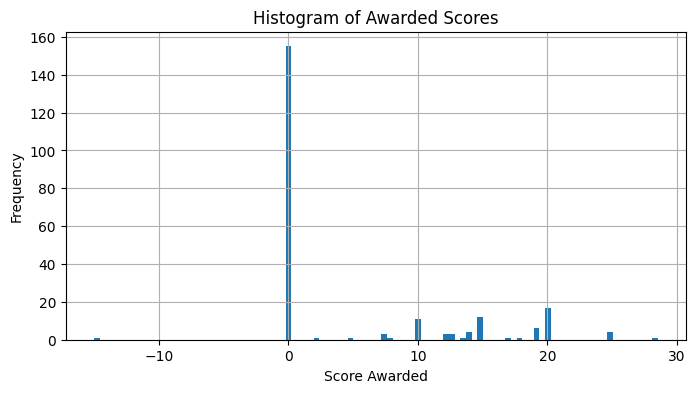

Mean score awarded: 4.75


count    226.000000
mean       4.748894
std        7.875295
min      -15.000000
25%        0.000000
50%        0.000000
75%       10.000000
max       28.500000
Name: Score Awarded, dtype: float64

In [8]:
plt.figure(figsize=(8, 4))
full_df["Score Awarded"].hist(bins=100)
plt.title("Histogram of Awarded Scores")
plt.xlabel("Score Awarded")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

print("Mean score awarded:", round(full_df["Score Awarded"].mean(), 2))
full_df["Score Awarded"].describe()


In [15]:
output_csv = base_dir / "combined_eval_reports_outputs_o3.csv"
full_df.to_csv(output_csv, index=False)
print(f"Saved combined report to {output_csv}")

Saved combined report to /Users/aaryanshah/canvas-hyperscribe/evaluations/cases/synthetic_unit_cases/med_management_collated/combined_eval_reports_outputs_o3.csv
